# Tuango - RFM Analysis for Mobile App Push Messaging

Prepare "Tuango: RFM Analysis for Mobile App Push Messaging" for class discussion and as an individual assignment and submit the assignment through GitLab. Detailed instructions are available in the tuango.pdf the document file in the assignment repo that will be forked to your GitLab projects page:

https://rsm-gitlab.ucsd.edu/dashboard/projects

The assignment is also available on Canvas. Please generate an HTML document with your answers to all the questions listed in the tuango.pdf file. When you have finished editing the Jupyter notebook and have generated the HTML report, make sure to save, commit, and push it to GitLab. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push git repos with python code.

[Using Git with Python Code](https://youtu.be/6mWc-FhQW5g)

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

We will collect your assignment from GitLab after the due date. Note that your python code must be fully "reproducible". That is, your Jupyter notebook must run without errors on my (or the TAs) computer and on the MSBA server. There is nothing that you need to submit to Canvas.

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom.

Note: GitLab will automatically tests if your work is fully reproducible each time to "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for this assignment will *not* test if your analysis is correct. Only if the code is valid and runs without issue in the docker container.

## Setup

Please complete this python notebook by answering the questions 1-14 in `tuango.pdf`.  The code blocks below will load a few python modules you will need and also the data you will need for this first notebook. 

Hint: Make sure to use the `xtile` function from the pyrsm package to create all RFM "bins"

In [1]:
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import matplotlib.pyplot as plt
# you can import additional python packages but only use packages that
# are already part of the docker container

In [2]:
## Use this dataset and notebook to answer questions 1-13
tuango = pd.read_pickle("data/tuango_pre.pkl")

tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,1
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,1
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,1
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,1
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,1
...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0


## Part I:  Preliminary and Quintile Analysis (Q1 to Q6, 3 points each)

### 1. What percentage of customers responded (i.e., bought anything) after the push message?

In [3]:
# insert calculation code here
# the result should be expressed as a percentage as a string with 2 decimal 
# places and assigned to q1 (e.g., q1 = '5.43%')

sample_all = tuango[tuango['buyer'].notnull()]
sample_yes = tuango[tuango['buyer'] == 'yes']

q1 = round((sample_yes.shape[0] / sample_all.shape[0])*100,2)
str(q1) + "%"


'2.98%'


### 2. What was the average amount spent on the Karaoke deal by customers that bought one (or more)? Use the `ordersize` variable for your calculation



In [4]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no, (2) the mean ordersize, and 
# (3) the standard deviation in ordersize for yes and no responses
# q2 = tuango[tuango["training"] == 1].groupby("buyer").ordersize.agg(number = "count",mean = np.mean,std = np.std)
q2 = pd.pivot_table(tuango, index = 'buyer', values = 'ordersize', aggfunc =  ['count',np.mean, np.std])
q2.columns = q2.columns.droplevel(1)

# the below should show your result
print(q2)
q2.loc["yes", "mean"]


       count        mean       std
buyer                             
yes      831  202.128761  40.48003
no     27047    0.000000   0.00000


202.12876052948255

### 3.	Create independent quintile variables for recency, frequency and monetary

In [5]:
# insert calculation code to add columns `rec_iq`, `freq_iq`, and `mon_iq`
# to the `tuango` DataFrame
# Hint: You can also use the 'assign' method for DataFrames to add multiple
# varialbes in one step

tuango["rec_iq"] = rsm.xtile(tuango.recency,5)
tuango["freq_iq"] = rsm.xtile(tuango.frequency, 5, rev =True)
tuango["mon_iq"] = rsm.xtile(tuango.monetary, 5, rev = True)



### 4.	Create bar charts showing the response rate (i.e., the proportion of customers who bought something) for this deal per (independent) recency, frequency, and monetary quintile (i.e., 3 plots)

> Note: Ensure the 1st quantile contains the best customers for each variable you create

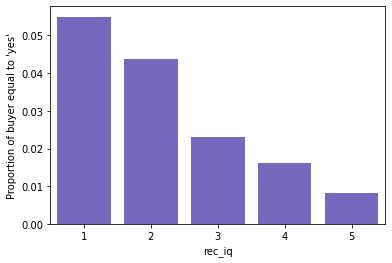

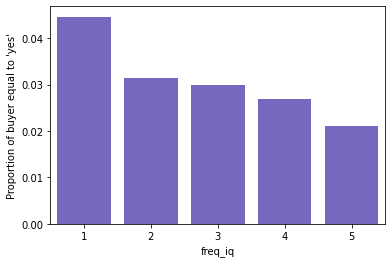

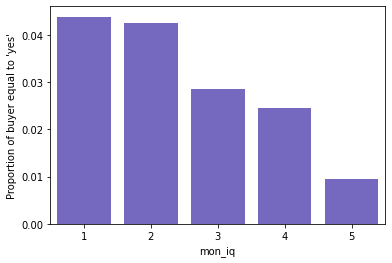

In [6]:
fig_rec = rsm.prop_plot(tuango[tuango.training == 1],"rec_iq","buyer","yes")
plt.show()
fig_freq = rsm.prop_plot(tuango[tuango.training == 1],"freq_iq","buyer","yes")
plt.show()
fig_mon = rsm.prop_plot(tuango[tuango.training == 1],"mon_iq","buyer","yes")
plt.show()



### 5.	Create bar charts showing the average amount spent (in RMB) (i.e., ordersize) per independent recency, frequency, and monetary quintile using only those customers who placed an order after the push message (i.e., 3 plots)



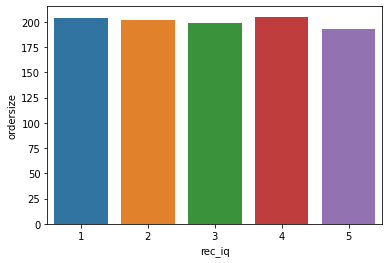

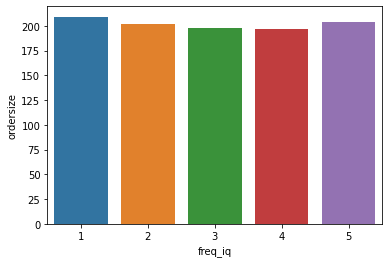

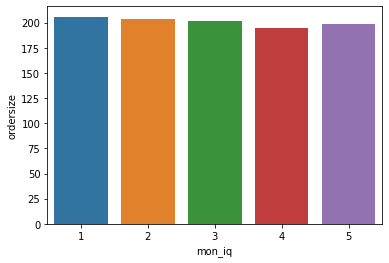

In [7]:
# insert code here


# sns.barplot(x = "rec_iq" , y = "ordersize", data = tuango[tuango.buyer == 'yes'])
# plt.show()
sns.barplot(x = "rec_iq" , y = "ordersize", data = tuango[tuango.buyer == 'yes'].groupby("rec_iq").ordersize.agg("mean").reset_index())
plt.show()
sns.barplot(x = "freq_iq" , y = "ordersize", data = tuango[tuango.buyer == 'yes'].groupby("freq_iq").ordersize.agg("mean").reset_index())
plt.show()
sns.barplot(x = "mon_iq" , y = "ordersize", data = tuango[tuango.buyer == 'yes'].groupby("mon_iq").ordersize.agg("mean").reset_index())
plt.show()

### 6.	What do the above bar charts reveal about the likelihood of response and the size of the order across the different recency, frequency, and monetary quintiles?

For the response rate, the recency model seems to split different customer behaviors into five groups, which are 0.055, 0.044, 0.023, 0.016 and 0.008, respectively. On the other hand, although the frequency model successfully distinguishes the 1st quintile of the customers (0.045), the rest of the groups do not show much different behaviors in terms of their response rates, which are 0.031, 0.030, 0.027 and 0.021, respectively. For the monetary model, group 2 (0.043) has almost identical response rate to group 1 (0.044), group 4 (0.025) has similar response rate to group 3 (0.029). Besides, all three models fail to differentiate customer behaviors in terms of the amount they spent on the deal. 

Considering the purpose of RFM analysis, which is to segment customers into groups based on their past behaviors, this would be a less than satisfying result if models can not quantify customers.


In [8]:
print(sum((tuango['rec_iq'] == 1) & (tuango['buyer'] == 'yes')) / sum((tuango['rec_iq'] == 1) & (tuango['training'] == 1)))
print(sum((tuango['rec_iq'] == 2) & (tuango['buyer'] == 'yes')) / sum((tuango['rec_iq'] == 2) & (tuango['training'] == 1)))
print(sum((tuango['rec_iq'] == 3) & (tuango['buyer'] == 'yes')) / sum((tuango['rec_iq'] == 3) & (tuango['training'] == 1)))
print(sum((tuango['rec_iq'] == 4) & (tuango['buyer'] == 'yes')) / sum((tuango['rec_iq'] == 4) & (tuango['training'] == 1)))
print(sum((tuango['rec_iq'] == 5) & (tuango['buyer'] == 'yes')) / sum((tuango['rec_iq'] == 5) & (tuango['training'] == 1)))


print(sum((tuango['freq_iq'] == 1) & (tuango['buyer'] == 'yes')) / sum((tuango['freq_iq'] == 1) & (tuango['training'] == 1)))
print(sum((tuango['freq_iq'] == 2) & (tuango['buyer'] == 'yes')) / sum((tuango['freq_iq'] == 2) & (tuango['training'] == 1)))
print(sum((tuango['freq_iq'] == 3) & (tuango['buyer'] == 'yes')) / sum((tuango['freq_iq'] == 3) & (tuango['training'] == 1)))
print(sum((tuango['freq_iq'] == 4) & (tuango['buyer'] == 'yes')) / sum((tuango['freq_iq'] == 4) & (tuango['training'] == 1)))
print(sum((tuango['freq_iq'] == 5) & (tuango['buyer'] == 'yes')) / sum((tuango['freq_iq'] == 5) & (tuango['training'] == 1)))

print(sum((tuango['mon_iq'] == 1) & (tuango['buyer'] == 'yes')) / sum((tuango['mon_iq'] == 1) & (tuango['training'] == 1)))
print(sum((tuango['mon_iq'] == 2) & (tuango['buyer'] == 'yes')) / sum((tuango['mon_iq'] == 2) & (tuango['training'] == 1)))
print(sum((tuango['mon_iq'] == 3) & (tuango['buyer'] == 'yes')) / sum((tuango['mon_iq'] == 3) & (tuango['training'] == 1)))
print(sum((tuango['mon_iq'] == 4) & (tuango['buyer'] == 'yes')) / sum((tuango['mon_iq'] == 4) & (tuango['training'] == 1)))
print(sum((tuango['mon_iq'] == 5) & (tuango['buyer'] == 'yes')) / sum((tuango['mon_iq'] == 5) & (tuango['training'] == 1)))

0.054941682013505216
0.043647540983606556
0.022944199706314245
0.016217201166180757
0.008294266137756943
0.04458955223880597
0.031413612565445025
0.02982832618025751
0.02679266259032796
0.021003134796238245
0.043867502238137866
0.04264198874977318
0.02863749555318392
0.024635856860276927
0.009465976067154849


## Part II: Profitability Analysis (Q7, 2 points; Q8 to Q13, 6 points each, Q14, 10 points)


### 7. What is the breakeven response rate?

In [9]:
# state your assumptions relevant to calculate the breakeven response rate
# breakeven should be of type `float`

cost = float(2.5)

margin = 0.5 * tuango[(tuango['training'] == 1) & (tuango['buyer'] == 'yes')].ordersize.mean()
margin
breakeven =  cost / margin
q7 = breakeven
q7

0.02473670736862159

### 8. What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 250,902 remaining customers?

In [10]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _nt stands for 'no targeting'

nr_sms_nt = tuango[tuango["training"] == 0].shape[0] # total number of SMSs that would be sent out

sms_cost_nt = cost* nr_sms_nt # cost of sending an sms (float)
nr_responses_nt = nr_sms_nt * sample_yes.shape[0] / sample_all.shape[0]  # total number of positive responses
response_rate_nt = nr_responses_nt / nr_sms_nt # expressed as a proportion (no rounding)
revenue_nt = nr_responses_nt * margin   # total revenue in RMB (no rounding)
profit_nt = revenue_nt - sms_cost_nt # total profit in RMB (no rounding)
ROME_nt = profit_nt / sms_cost_nt # Return on Marketing Expenditures expressed as a proportion (no rounding)
nr_sms_nt,sms_cost_nt,nr_responses_nt,response_rate_nt,revenue_nt,profit_nt,ROME_nt

(250902,
 627255.0,
 7479.0,
 0.02980845110840089,
 755860.5,
 128605.5,
 0.20502905516895042)

### 9. Evaluate the performance implications of offering the deal to only those customers (out of 250,902) in RFM cells with a response rate greater than the breakeven response rate

Generate your result based on both sequential and independent RFM. Determine the projected profit in RMB and the return on marketing expenditures for each approach

In [11]:
# add `rfm_iq` to the tuango dataset
tuango["rfm_iq"] =tuango.rec_iq.astype(str) + tuango.freq_iq.astype(str) + tuango.mon_iq.astype(str)

In [12]:
# determine which customers to sms based on independent quintiles RFM

# subset a dataframe to calculate response rate of each rfm
rfm_iq = tuango[tuango["training"] == 1].copy()

rfm_iq['buyer_y'] = rfm_iq.buyer == "yes"
rfm_iq = rfm_iq.groupby("rfm_iq").buyer_y.agg(response = "mean").reset_index()

rfm_iq["smsto_iq"] = rfm_iq["response"] > breakeven
rfm_iq


,rfm_iq,response,smsto_iq
0,111,0.178295,True
1,112,0.138889,True
2,113,0.058333,True
3,114,0.074919,True
4,115,0.039474,True
...,...,...,...
120,551,0.000000,False
121,552,0.015625,False
122,553,0.009231,False
123,554,0.000000,False


In [13]:
# left join the rfm_iq to tuango
tuango = tuango.merge(rfm_iq, left_on = "rfm_iq", right_on = "rfm_iq", how = 'left')
tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq,rfm_iq,response,smsto_iq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,1,5,1,4,514,0.036145,True
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,1,5,1,4,514,0.036145,True
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,1,5,5,3,553,0.009231,False
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,1,5,5,4,554,0.000000,False
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,1,5,5,5,555,0.003802,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0,5,1,5,515,0.010870,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0,2,3,1,231,0.084337,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0,4,1,5,415,0.008403,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0,3,2,4,324,0.037037,True


In [14]:
# insert calculation code to add columns `freq_sq`, and `mon_sq`
# to the `tuango` DataFrame
# Note that pandas `assign` method doesn't allow you to use variables created in the same call to assign

tuango = tuango.assign(freq_sq = tuango.groupby("rec_iq").frequency.transform(rsm.xtile, 5, rev = True))
tuango = tuango.assign(mon_sq = tuango.groupby(["rec_iq","freq_sq"]).monetary.transform(rsm.xtile, 5, rev = True))


In [15]:
# add `rfm_sq` to the tuango dataset
tuango["rfm_sq"] = tuango.rec_iq.astype(str) + tuango.freq_sq.astype(str) + tuango.mon_sq.astype(str)

In [16]:
# determine which customers to sms based on sequential quintiles RFM

rfm_sq = tuango[tuango["training"] == 1].copy()

rfm_sq['buyer_y'] = rfm_sq.buyer == "yes"
rfm_sq = rfm_sq.groupby("rfm_sq").buyer_y.agg(response_sq = "mean").reset_index()

rfm_sq["smsto_sq"] = rfm_sq["response_sq"] > breakeven

rfm_sq



,rfm_sq,response_sq,smsto_sq
0,111,0.162896,True
1,112,0.089202,True
2,113,0.081818,True
3,114,0.057692,True
4,115,0.040541,True
...,...,...,...
120,551,0.007752,False
121,552,0.017094,False
122,553,0.003636,False
123,554,0.000000,False


In [17]:
tuango = tuango.merge(rfm_sq, left_on = "rfm_sq", right_on = "rfm_sq", how = 'left')
tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,freq_iq,mon_iq,rfm_iq,response,smsto_iq,freq_sq,mon_sq,rfm_sq,response_sq,smsto_sq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,...,1,4,514,0.036145,True,1,4,514,0.023256,False
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,...,1,4,514,0.036145,True,1,4,514,0.023256,False
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,...,5,3,553,0.009231,False,5,3,553,0.003636,False
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,...,5,4,554,0.000000,False,5,4,554,0.000000,False
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,...,5,5,555,0.003802,False,5,5,555,0.003876,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,1,5,515,0.010870,False,1,5,515,0.014778,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,3,1,231,0.084337,True,3,1,231,0.090426,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,1,5,415,0.008403,False,1,4,414,0.000000,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,2,4,324,0.037037,True,2,4,324,0.040000,True


In [18]:
# write your perf_calc function here (see the tuango.pdf document for suggestions)
def perf_calc(dat=tuango, smsto=None, intro="", perf="buyer", lev="yes"):
    """
    Calculate projected performance implications from using different 
    targeting strategies

    Parameters
    ----------
    dat : Pandas DataFrame
        Pass the tuango dataset as the default value
    smsto : str
        A string with the name of the 'smsto' variable to use for calculations
    intro : str
        A string that provides an introduction to the printed output
    perf: str
        A string with the name of the performance variable to use ('buyer')
    lev: str
        A string with the name of the level in the perf variable that signifies success ('yes')

    Returns
    -------
    nr_sms : Total number of SMSs that would be sent out
    sms_cost : Total revenue in RMB (no rounding)
    nr_responses : Total number of positive responses
    response_rate : Expressed as a proportion (no rounding)
    revenue : Total revenue in RMB (no rounding)
    ROME : Return on Marketing Expenditures expressed as a proportion (no rounding)
    profit : Total profit in RMB (no rounding)
    """
    
    
    if smsto != None:
        dat = dat[dat[smsto]]
    
    sample = dat[dat['training'] == 1]
    
    
    response_rate = (sample[perf] == lev).mean()
    nr_sms = dat[dat['training'] == 0].shape[0]
    sms_cost = cost * nr_sms
    nr_responses = response_rate * nr_sms
    revenue = nr_responses * sample[sample[perf] == lev].ordersize.agg('mean') *0.5 
    profit = revenue - sms_cost
    ROME = profit / sms_cost
    intro = str(intro)
    
    print(f"""{intro}, tuango would mail all {nr_sms:,.0f} ({100 * nr_sms / 278780:.2f}%) customers. The response rate for the selected customers is predicted to be {100 * response_rate:.2f}% or {nr_responses:,.0f} buyers. The revenue is equal to ${revenue:,.0f}. The expected profit is ${profit:,.0f}. The mailing cost is estimated to be ${sms_cost:,.0f} with a ROME of {100 * ROME:.2f}%""")
    return nr_sms, sms_cost, nr_responses, response_rate, revenue, ROME, profit, intro
    

In [19]:
# re-calculate performance for the no-targeting approach - should give same results as above
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _nt stands for 'no targeting'
nr_sms_nt, sms_cost_nt, nr_responses_nt, response_rate_nt, revenue_nt, ROME_nt, profit_nt, intro = perf_calc(tuango, intro="If Tuango does not apply targeting")



If Tuango does not apply targeting, tuango would mail all 250,902 (90.00%) customers. The response rate for the selected customers is predicted to be 2.98% or 7,479 buyers. The revenue is equal to $755,860. The expected profit is $128,606. The mailing cost is estimated to be $627,255 with a ROME of 20.50%


In [20]:
# calculate performance for independent RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _iq stands for 'independent quintiles'

nr_sms_iq, sms_cost_iq, nr_responses_iq, response_rate_iq, revenue_iq, ROME_iq, profit_iq, intro = perf_calc(tuango, smsto = 'smsto_iq', intro = "Based on independent RFM")



Based on independent RFM, tuango would mail all 111,656 (40.05%) customers. The response rate for the selected customers is predicted to be 5.41% or 6,042 buyers. The revenue is equal to $611,590. The expected profit is $332,450. The mailing cost is estimated to be $279,140 with a ROME of 119.10%


In [21]:
# calculate performance for sequential RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _sq stands for 'sequential quintiles'

nr_sms_sq, sms_cost_sq, nr_responses_sq, response_rate_sq, revenue_sq, ROME_sq, profit_sq, intro = perf_calc(tuango, smsto = 'smsto_sq', intro = "Based on sequential RFM")




Based on sequential RFM, tuango would mail all 101,321 (36.34%) customers. The response rate for the selected customers is predicted to be 5.76% or 5,837 buyers. The revenue is equal to $596,041. The expected profit is $342,738. The mailing cost is estimated to be $253,302 with a ROME of 135.31%


In [22]:

(tuango.rfm_iq_pre == tuango.rfm_iq).sum(),(tuango.rfm_iq_pre != tuango.rfm_iq).any()



(278780, False)

### 10.	What do you notice when you compare the `rfm_iq` and `rfm_sq` variables? Do the two approaches generally yield the same RFM index for any given customer? What do you see as the pros and cons of the two approaches (from a statistical as well as logical perspective) and why?

6272 595
4325 908


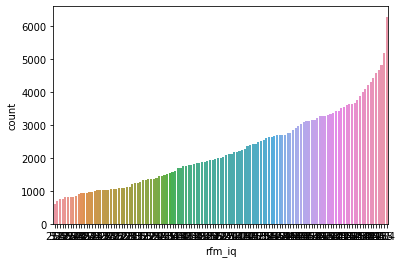

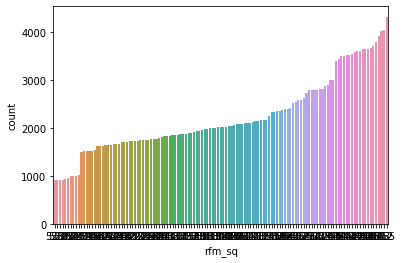

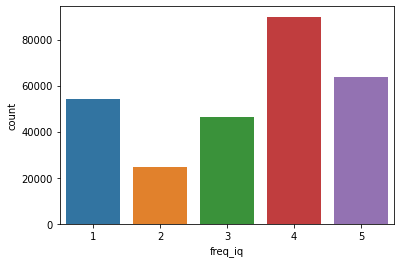

,freq_iq,count,prop
0,1,54038,0.193837
1,2,24644,0.088399
2,3,46455,0.166637
3,4,89889,0.322437
4,5,63754,0.228689


In [23]:
# insert any calculation or plotting code here
a= tuango.groupby("rfm_iq").rfm_iq.agg(count = 'count').reset_index().sort_values('count')
print(max(a["count"]) , min(a["count"]))


b = tuango.groupby("rfm_sq").rfm_sq.agg(count = 'count').reset_index().sort_values('count')
print(max(b["count"]) , min(b["count"]))


sns.barplot(x = 'rfm_iq', y = 'count', data = tuango.groupby("rfm_iq").rfm_iq.agg(count = 'count').reset_index().sort_values('count'))
plt.show()
sns.barplot(x = 'rfm_sq', y = 'count', data = tuango.groupby("rfm_sq").rfm_sq.agg(count = 'count').reset_index().sort_values('count'))
plt.show()
# sns.barplot(x = 'rfm_iq', y = 'count', data = tuango.groupby("rfm_iq").rfm_iq.agg(count = 'count').reset_index().sort_values('rfm_iq'))
# plt.show()
# sns.barplot(x = 'rfm_sq', y = 'count', data = tuango.groupby("rfm_sq").rfm_sq.agg(count = 'count').reset_index().sort_values('rfm_sq'))
# plt.show()
# sns.barplot(x = 'rec_iq', y = 'count', data = tuango.groupby("rec_iq").rec_iq.agg(count = 'count').reset_index().sort_values('rec_iq'))
# plt.show()
sns.barplot(x = 'freq_iq', y = 'count', data = tuango.groupby("freq_iq").freq_iq.agg(count = 'count').reset_index().sort_values('freq_iq'))
plt.show()

f = tuango.groupby('freq_iq').frequency.agg('mean')
f
g = tuango.groupby("freq_iq").frequency.agg(count = 'count').reset_index().sort_values('freq_iq')
g['prop'] = g['count'] / sum(g['count'])
g
# # sns.barplot(x = 'mon_iq', y = 'count', data = tuango.groupby("mon_iq").mon_iq.agg(count = 'count').reset_index().sort_values('mon_iq'))
# plt.show()




Independent quintile method sorts customers in descending order and then assigns scores for recency, frequency and monetary from 1 to 5 (the highest to the lowest). The three ranks are independent. Sequential approach simply ranks recency values from the greatest to the least. Within each recency score, customers are then assigned a frequency rank, and within each frequency rank, customers are ranked according to monetary and subsequently split into 5 bins. There are pros and cons of rfm_iq and rfm_sq.

rfm_iq : 
* pros : it's easy to understand and interpret the application of rfm_iq. For example, a monetary rank of 3 for one customer represents the same as a monetary score of 3 for another customer, no matter what their recency or frequency scores. 
* cons : the plots above depict that rfm_iq results in less equal-sized groups for each RFM character with the number of the customers ranging from 595 to 6272. This can happen if the data is skewed. For instance, in tuango's data, frequency variable is skewed that 32% of existing customers shopped average 2.5 times in bin 4 during the past year, so the bins do not equally sized.



rfm_sq :  
* pros : the above plots show that rfm_sq method provides a more even distribution of nested RFM scores. The number of customers is ranging from 908 to 4325 in each RFM bin. Moreover, it presents customers' purchase behavior (frequency and monetary) changes over time (recency) through sequential binning. 
* cons : It assumes recency is the most relevant variables that has effect on the customer response while the importance of each RFM character is different among companies.


### 11.	The answer to question 9 assumes a single breakeven response rate that applies across all cells. Redo your analysis for sequential RFM based on a breakeven response rate calculated for each RFM cell. What implications can you draw from the difference in predicted performance compared to question 9?

> Note: You only need to calculate smsto_pcsq for this approach. You can use your perf_calc function to determine the performance implications without any adjustments

<!-- > Note: To project the expected profits for the remaining customers not part of the sample you can use Tuango’s standard fee and the ordersize number you calculated for question 2. -->

In [24]:
# calculate the average ordersize per sq code

# tuango["avg_ordersize_sq"] = 
df_avg_ordersize_sq = tuango[tuango['buyer'] == 'yes'].groupby("rfm_sq").ordersize.agg(avg_ordersize_sq = 'mean').reset_index()
tuango = tuango.merge(df_avg_ordersize_sq, left_on = 'rfm_sq', right_on = 'rfm_sq',how = 'left')

# calculate a breakeven value per sq code
tuango["breakeven_pc"] = cost / (tuango['avg_ordersize_sq'] * 0.5)

# calculate the smsto variable based on breakeven value per sq code
# _pcsq stands for 'per cell sequential quintiles'

tuango["smsto_pcsq"] = tuango['response_sq'] > tuango['breakeven_pc']
tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,response,smsto_iq,freq_sq,mon_sq,rfm_sq,response_sq,smsto_sq,avg_ordersize_sq,breakeven_pc,smsto_pcsq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,...,0.036145,True,1,4,514,0.023256,False,161.000000,0.031056,False
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,...,0.036145,True,1,4,514,0.023256,False,161.000000,0.031056,False
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,...,0.009231,False,5,3,553,0.003636,False,209.000000,0.023923,False
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,...,0.000000,False,5,4,554,0.000000,False,NaN,NaN,False
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,...,0.003802,False,5,5,555,0.003876,False,209.000000,0.023923,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,0.010870,False,1,5,515,0.014778,False,182.333333,0.027422,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,0.084337,True,3,1,231,0.090426,True,176.058824,0.028400,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,0.008403,False,1,4,414,0.000000,False,NaN,NaN,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,0.037037,True,2,4,324,0.040000,True,189.000000,0.026455,True


In [25]:
# calculate performance for break-even-per-cell sequential RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _pcsq stands for 'per cell sequential quintiles'

nr_sms_pcsq, sms_cost_pcsq, nr_responses_pcsq, response_rate_pcsq, revenue_pcsq, ROME_pcsq, profit_pcsq, intro = perf_calc(tuango,
    smsto="smsto_pcsq", intro="Based on sequential RFM with breakeven per cell"
)




Based on sequential RFM with breakeven per cell, tuango would mail all 110,617 (39.68%) customers. The response rate for the selected customers is predicted to be 5.47% or 6,053 buyers. The revenue is equal to $619,912. The expected profit is $343,369. The mailing cost is estimated to be $276,542 with a ROME of 124.17%


### 12.	The answer to question 9 does not account for the fact that the response rate for each cell is an estimated quantity (i.e., it has a standard error). Redo your analysis for both independent RFM, adjusting for the standard error of the response rate in each cell

In [26]:
# insert calculation code here - you do not need to do this 'per cell'
# _lbsq stands for 'lower bound independent quintiles'
df_response_lbsq = tuango[tuango["training"] == 1].copy()

df_response_lbsq['buyer_y'] = df_response_lbsq.buyer == "yes"
df_response_lbsq = df_response_lbsq.groupby("rfm_sq").buyer_y.agg(prop_sq = np.mean, se_sq = rsm.seprop).reset_index()
df_response_lbsq = df_response_lbsq.assign(prop_lbsq = df_response_lbsq.prop_sq - 1.64 * df_response_lbsq.se_sq)
df_response_lbsq["smsto_lbsq"] = df_response_lbsq["prop_lbsq"] > breakeven

tuango = tuango.merge(df_response_lbsq, left_on = 'rfm_sq', right_on = 'rfm_sq',how = 'left')

tuango["smsto_lbsq"] = tuango['prop_lbsq'] > breakeven

tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,rfm_sq,response_sq,smsto_sq,avg_ordersize_sq,breakeven_pc,smsto_pcsq,prop_sq,se_sq,prop_lbsq,smsto_lbsq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,...,514,0.023256,False,161.000000,0.031056,False,0.023256,0.010279,0.006399,False
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,...,514,0.023256,False,161.000000,0.031056,False,0.023256,0.010279,0.006399,False
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,...,553,0.003636,False,209.000000,0.023923,False,0.003636,0.003630,-0.002316,False
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,...,554,0.000000,False,NaN,NaN,False,0.000000,0.000000,0.000000,False
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,...,555,0.003876,False,209.000000,0.023923,False,0.003876,0.003868,-0.002468,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,515,0.014778,False,182.333333,0.027422,False,0.014778,0.008469,0.000889,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,231,0.090426,True,176.058824,0.028400,True,0.090426,0.020916,0.056123,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,414,0.000000,False,NaN,NaN,False,0.000000,0.000000,0.000000,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,324,0.040000,True,189.000000,0.026455,True,0.040000,0.019596,0.007863,False


In [27]:
# calculate the performance for lower bound with sequential quintiles
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _lbsq stands for 'lower bound with sequential quintiles'

nr_sms_lbsq, sms_cost_lbsq, nr_responses_lbsq, response_rate_lbsq, revenue_lbsq, ROME_lbsq, profit_lbsq, intro = perf_calc(
    tuango,
    smsto="smsto_lbsq",
    intro="Based on sequential RFM adjusted for response rate prediction accuracy",
)




Based on sequential RFM adjusted for response rate prediction accuracy, tuango would mail all 54,974 (19.72%) customers. The response rate for the selected customers is predicted to be 7.43% or 4,083 buyers. The revenue is equal to $420,673. The expected profit is $283,238. The mailing cost is estimated to be $137,435 with a ROME of 206.09%


In [28]:
# insert calculation code here - you do not need to do this 'per cell'
# _lbiq stands for 'lower bound independent quintiles'
df_response_lbiq = tuango[tuango["training"] == 1].copy()

df_response_lbiq['buyer_y'] = df_response_lbiq.buyer == "yes"
df_response_lbiq = df_response_lbiq.groupby("rfm_iq").buyer_y.agg(prop_iq = np.mean, se_iq = rsm.seprop).reset_index()
df_response_lbiq = df_response_lbiq.assign(prop_lbiq = df_response_lbiq.prop_iq - 1.64 * df_response_lbiq.se_iq)
df_response_lbiq["smsto_lbiq"] = df_response_lbiq["prop_lbiq"] > breakeven

tuango = tuango.merge(df_response_lbiq, left_on = 'rfm_iq', right_on = 'rfm_iq',how = 'left')


tuango["smsto_lbiq"] =tuango['prop_lbiq'] > breakeven
tuango


,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,breakeven_pc,smsto_pcsq,prop_sq,se_sq,prop_lbsq,smsto_lbsq,prop_iq,se_iq,prop_lbiq,smsto_lbiq
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,...,0.031056,False,0.023256,0.010279,0.006399,False,0.036145,0.014487,0.012386,False
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,...,0.031056,False,0.023256,0.010279,0.006399,False,0.036145,0.014487,0.012386,False
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,...,0.023923,False,0.003636,0.003630,-0.002316,False,0.009231,0.005305,0.000531,False
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,...,NaN,False,0.000000,0.000000,0.000000,False,0.000000,0.000000,0.000000,False
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,...,0.023923,False,0.003876,0.003868,-0.002468,False,0.003802,0.003795,-0.002422,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,0.027422,False,0.014778,0.008469,0.000889,False,0.010870,0.007644,-0.001667,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,0.028400,True,0.090426,0.020916,0.056123,True,0.084337,0.015251,0.059325,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,NaN,False,0.000000,0.000000,0.000000,False,0.008403,0.005917,-0.001301,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,0.026455,True,0.040000,0.019596,0.007863,False,0.037037,0.020984,0.002624,False


In [29]:
# calculate the performance for lower bound with independent quintiles
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _lbiq stands for 'lower bound with independent quintiles'

nr_sms_lbiq, sms_cost_lbiq, nr_responses_lbiq, response_rate_lbiq, revenue_lbiq, ROME_lbiq, profit_lbiq, intro = perf_calc(
    dat = tuango,
    smsto="smsto_lbiq",
    intro="Based on independent RFM adjusted for response rate prediction accuracy",
)


Based on independent RFM adjusted for response rate prediction accuracy, tuango would mail all 54,445 (19.53%) customers. The response rate for the selected customers is predicted to be 7.56% or 4,116 buyers. The revenue is equal to $423,445. The expected profit is $287,333. The mailing cost is estimated to be $136,112 with a ROME of 211.10%


### 13.	Create a bar chart with profit information and a bar chart with ROME numbers for the analyses conducted in questions 9, 11, and 12

In [30]:
# the below DataFrame should collect all performance information you created above
plot_data = pd.DataFrame(
    {
        "name": [
            "No targeting",
            "Indep. RFM",
            "Seq. RFM",
            "Seq. PC RFM",
            "Indep. LB RFM",
            "Seq. LB RFM"
        ],
        "Profit": [
            profit_nt,
            profit_iq,
            profit_sq,
            profit_pcsq,
            profit_lbiq,
            profit_lbsq
        ],
        "ROME": [ROME_nt, ROME_iq, ROME_sq, ROME_pcsq, ROME_lbiq, ROME_lbsq],
    }
)

<AxesSubplot:xlabel='name', ylabel='Profit'>

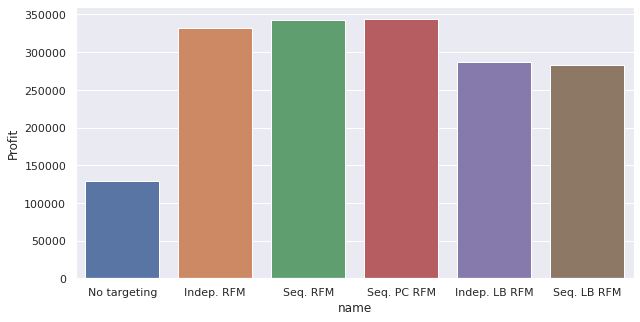

In [31]:
# insert code for the profit plot based on the 'plot_data' DataFrame
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x = 'name', y = 'Profit', data = plot_data)


<AxesSubplot:xlabel='name', ylabel='ROME'>

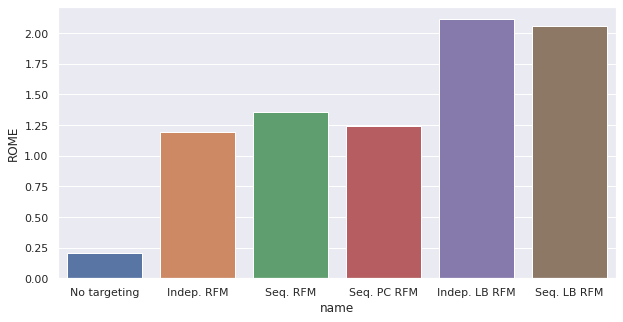

In [32]:
# insert code for the ROME plot based on the 'plot_data' DataFrame

sns.barplot(x = 'name', y = 'ROME', data = plot_data)


### Question 14

Make a copy of the current notebook `tuango-pre.ipynb` and name the copy `tuango-post.ipynb`. You also have access to a dataset with the results from the SMS roll-out (`tuango_post.pkl`). Tuango actually contacted all 250,902 customers. The data has a "training" variable (training = 1 for the data used in the test, training = 0 for the remaining customers). You can use this variable to help evaluate the actual performance for each of the different RFM approaches. Re-create the plot in question 13 based on this new dataset. 

Instead of using the `tuango_pre.pkl` data, use `tuango_post.pkl`. You should be able to re-use most of your code and text. Create a new function `perf_calc_actual` that calculates the actual performance for each targeting approach on the 'roll out' sample (i.e., training == 0). Also, keep your `perf_calc` and use it to check that this still calculates the same values you were seeing before based on the `tuango-pre.pkl` data. The `perf_calc_actual` function will be similar to `perf_calc` but you will need to make some changes to determine the actual outcomes. Also make sure to check that your `rfm_iq` variable is the same as `rfm_iq_pre` in the `tuango_post.pkl` dataset.

> Hint: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., training == 0) when calculating the break-even response rate etc. for targeting. 